In [31]:
# Library
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
data = pd.read_csv('Data_Nasabah.csv')


In [3]:
print("Total data:", data.shape)

Total data: (100, 1)


In [4]:
print("Type data:", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   nasabah_id;umur;jenis_kelamin;pendapatan;saldo_rata_rata;jumlah_transaksi;jenis_produk;frekuensi_kunjungi_cabang;pengguna_mobile_banking;skor_kredit  100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes
Type data: None


In [5]:
print("Statistic:", data.describe())

Statistic:        nasabah_id;umur;jenis_kelamin;pendapatan;saldo_rata_rata;jumlah_transaksi;jenis_produk;frekuensi_kunjungi_cabang;pengguna_mobile_banking;skor_kredit
count                                                 100                                                                                                  
unique                                                100                                                                                                  
top     N001;22;Perempuan;5800000;1508000;19;tabungan;...                                                                                                  
freq                                                    1                                                                                                  


In [6]:
print("First column data:", data.head())

First column data:   nasabah_id;umur;jenis_kelamin;pendapatan;saldo_rata_rata;jumlah_transaksi;jenis_produk;frekuensi_kunjungi_cabang;pengguna_mobile_banking;skor_kredit
0  N001;22;Perempuan;5800000;1508000;19;tabungan;...                                                                                                  
1  N002;64;Perempuan;5700000;1254000;9;kartu_kred...                                                                                                  
2  N003;27;Perempuan;2950000;590000;12;tabungan;1...                                                                                                  
3  N004;34;Perempuan;3100000;186000;16;deposito;5...                                                                                                  
4  N005;45;Laki-Laki;6700000;1474000;15;kartu_kre...                                                                                                  


In [7]:
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")

nasabah_id;umur;jenis_kelamin;pendapatan;saldo_rata_rata;jumlah_transaksi;jenis_produk;frekuensi_kunjungi_cabang;pengguna_mobile_banking;skor_kredit: 100


In [8]:
# Cleansing data
new_data = pd.read_csv("Data_Nasabah.csv", delimiter=';')

In [9]:
print("\nData:")
print(new_data.head())

# Information data
print("\n\nInformation:")
print(new_data.info())

# Statistic
print("\n\n\nStatistic:")
print(new_data.describe())


Data:
  nasabah_id  umur jenis_kelamin  pendapatan  saldo_rata_rata  \
0       N001    22     Perempuan     5800000          1508000   
1       N002    64     Perempuan     5700000          1254000   
2       N003    27     Perempuan     2950000           590000   
3       N004    34     Perempuan     3100000           186000   
4       N005    45     Laki-Laki     6700000          1474000   

   jumlah_transaksi  jenis_produk  frekuensi_kunjungi_cabang  \
0                19      tabungan                          1   
1                 9  kartu_kredit                          2   
2                12      tabungan                          1   
3                16      deposito                          5   
4                15  kartu_kredit                          3   

  pengguna_mobile_banking  skor_kredit  
0                   TIDAK          900  
1                   TIDAK          900  
2                      YA          500  
3                   TIDAK          700  
4           

In [10]:
print("Total value every column:")
for column in new_data.columns:
    print(f"{column}: {new_data[column].nunique()}")

Total value every column:
nasabah_id: 100
umur: 40
jenis_kelamin: 2
pendapatan: 30
saldo_rata_rata: 90
jumlah_transaksi: 24
jenis_produk: 3
frekuensi_kunjungi_cabang: 5
pengguna_mobile_banking: 2
skor_kredit: 5


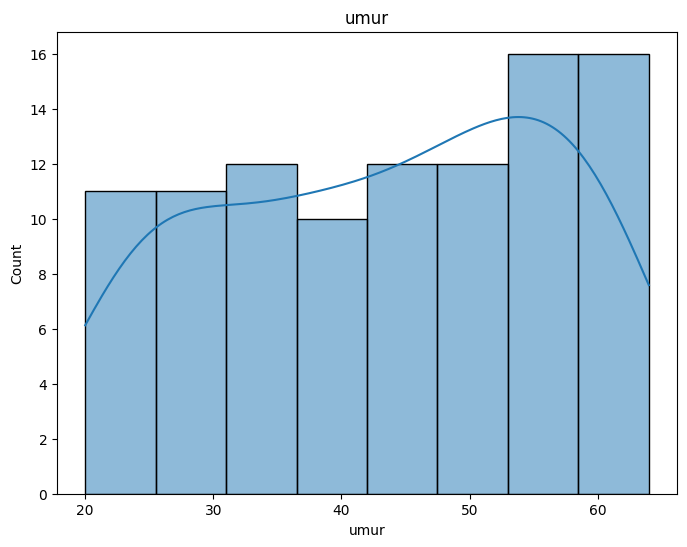

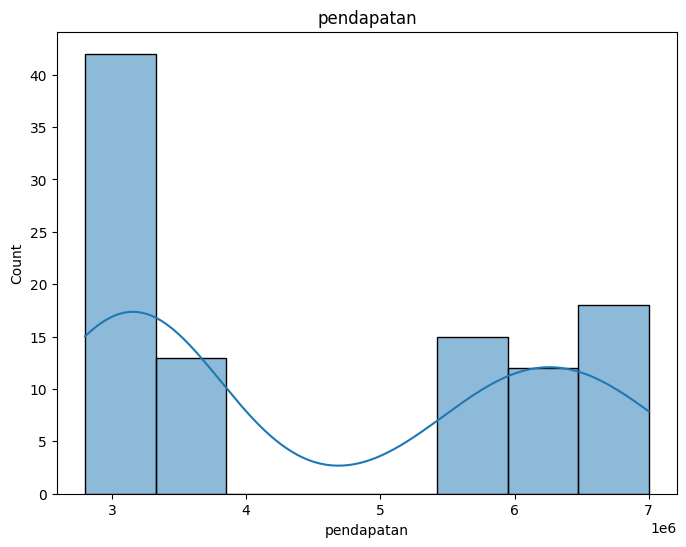

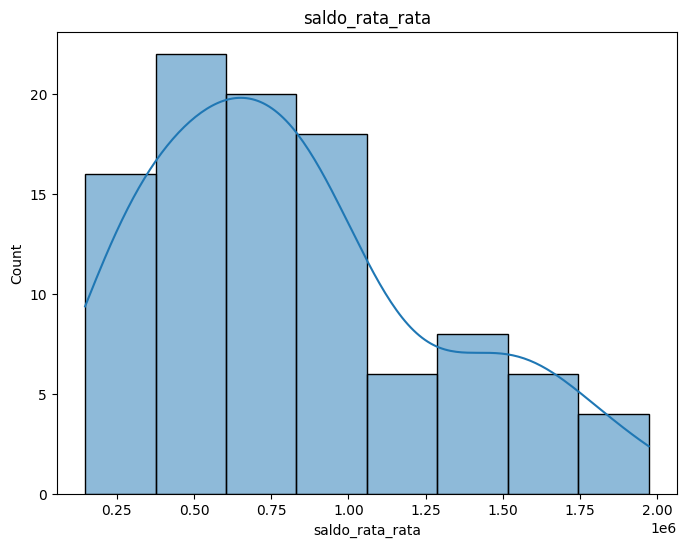

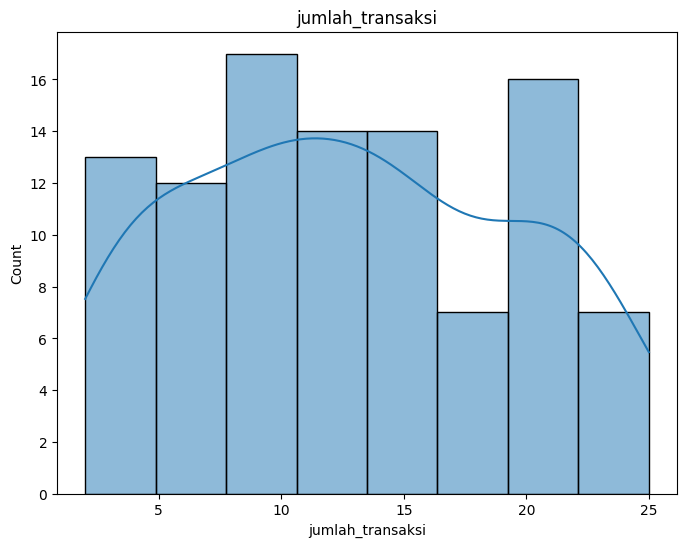

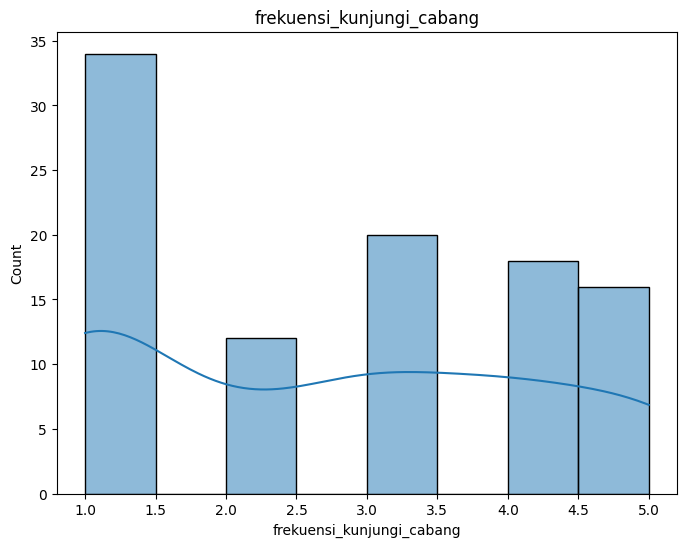

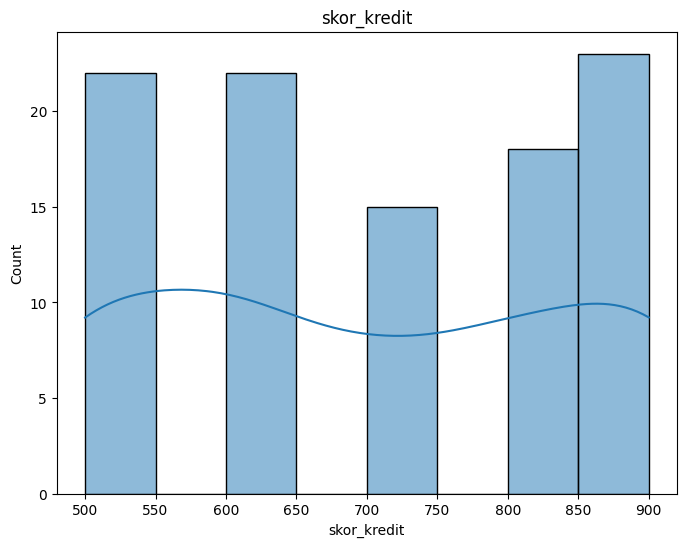

In [11]:
numerical_features = new_data.select_dtypes(include=['number']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(new_data[feature], kde=True)
    plt.title(f"{feature}")
    plt.show()

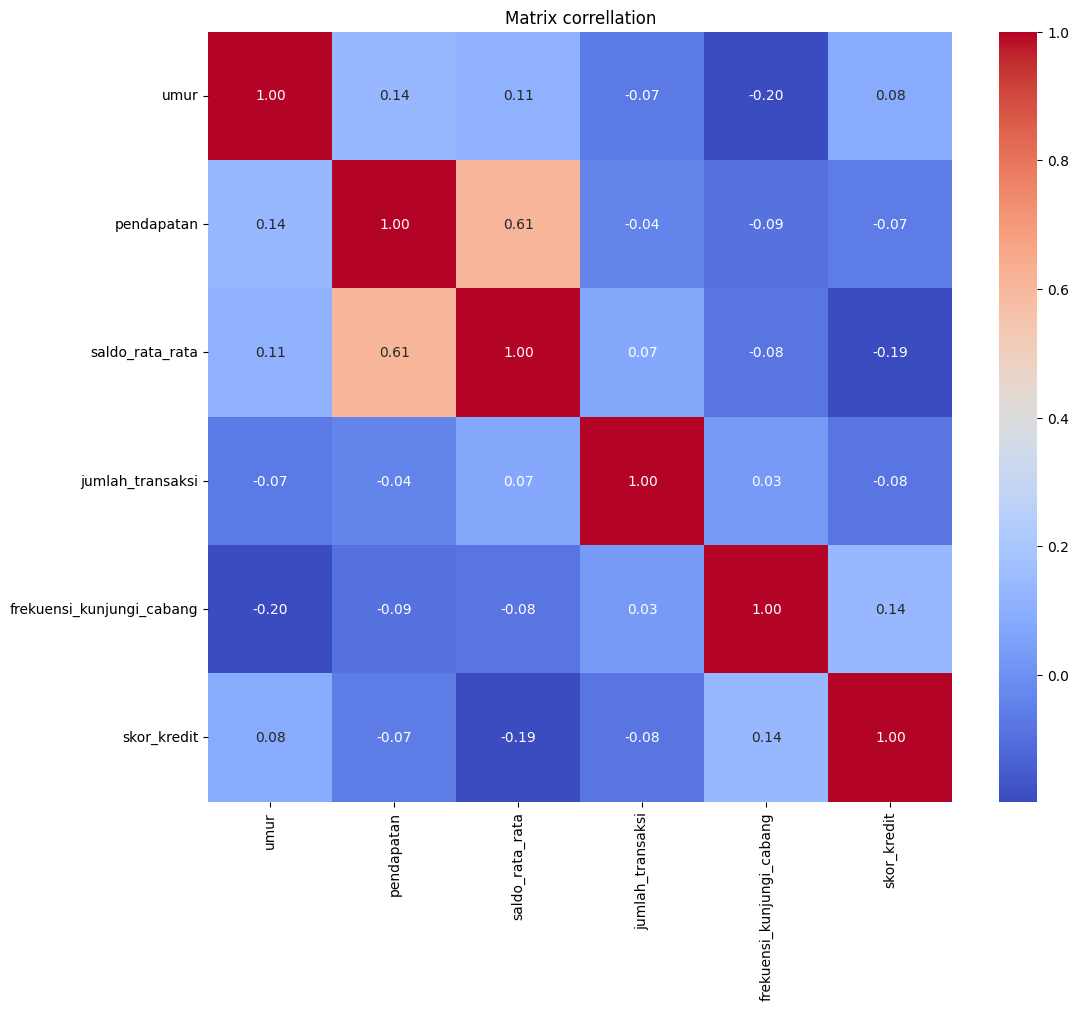

In [12]:
numerical_data = new_data.select_dtypes(include=['number'])  
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrix correllation")
plt.show()

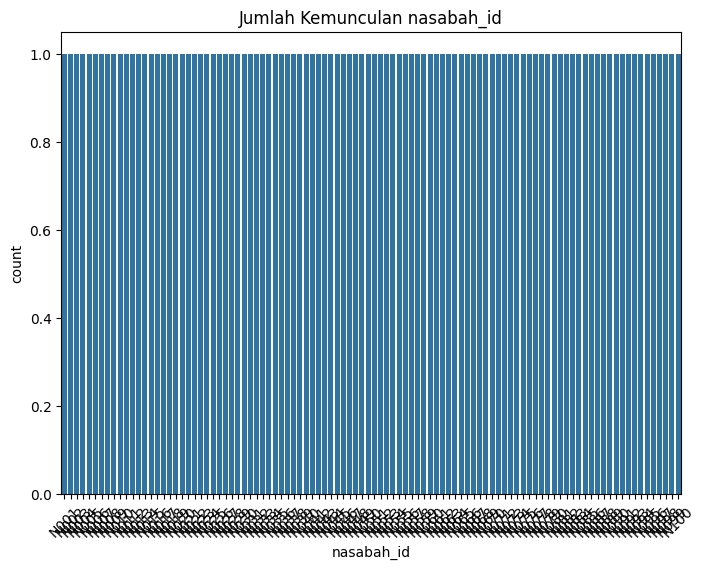

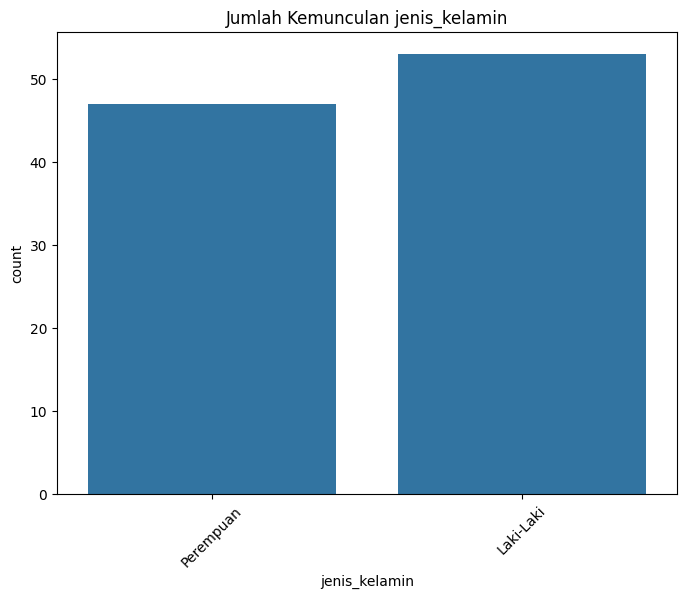

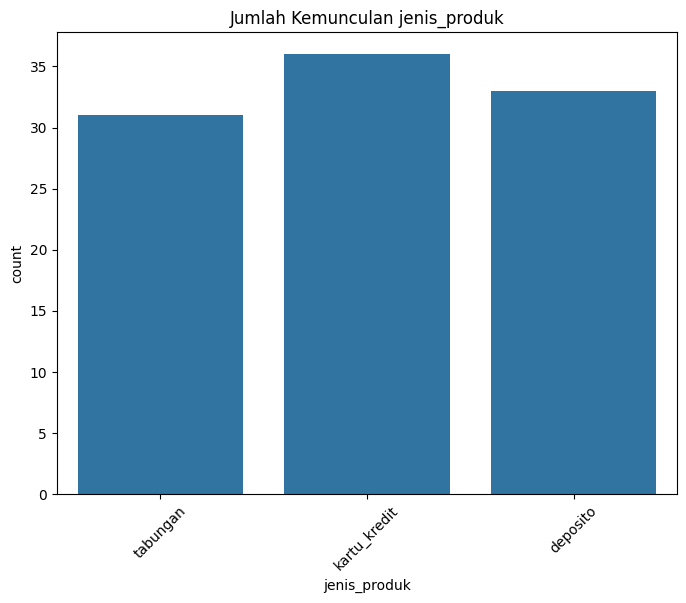

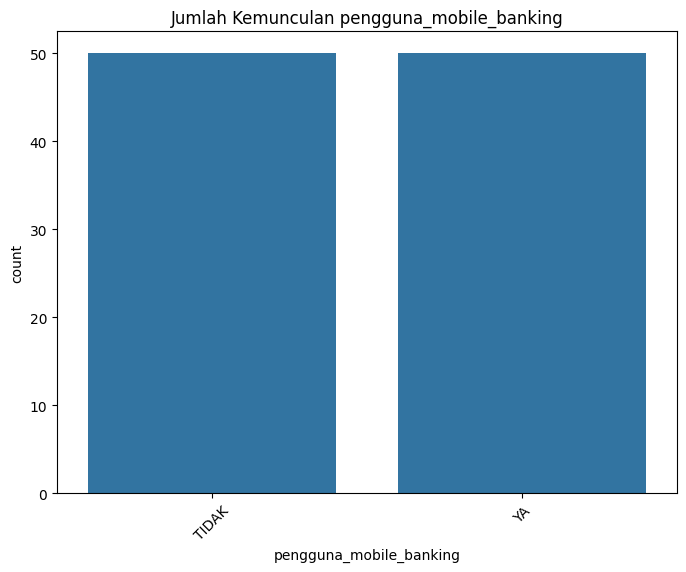

In [14]:
categorical_features = new_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=new_data)
    plt.title(f"Jumlah Kemunculan {feature}")
    plt.xticks(rotation=45)
    plt.show()

In [16]:
missing_values = new_data.isnull().sum()
print("\nMissing Values per column:")
print(missing_values)


Missing Values per column:
nasabah_id                   0
umur                         0
jenis_kelamin                0
pendapatan                   0
saldo_rata_rata              0
jumlah_transaksi             0
jenis_produk                 0
frekuensi_kunjungi_cabang    0
pengguna_mobile_banking      0
skor_kredit                  0
dtype: int64


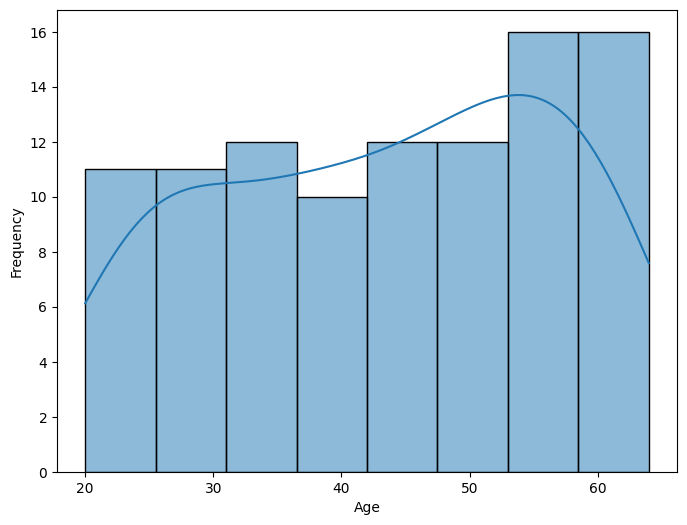

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(new_data['umur'], kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

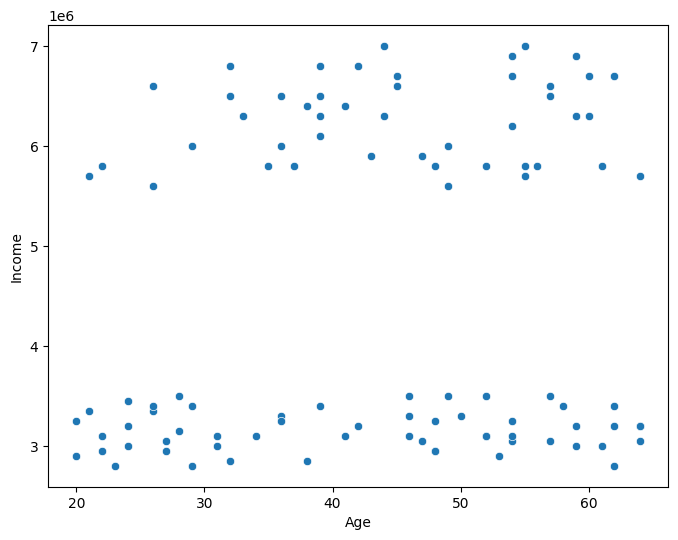

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='umur', y='pendapatan', data=new_data)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

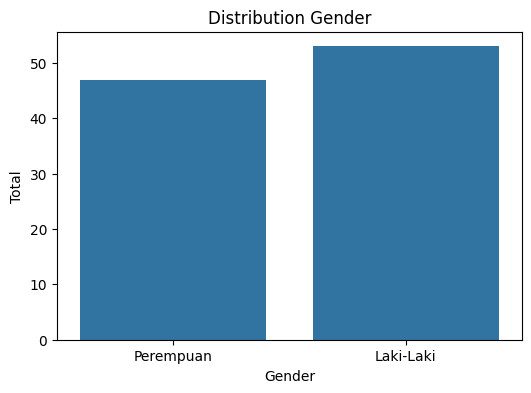

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='jenis_kelamin', data=new_data)
plt.title('Distribution Gender')
plt.xlabel('Gender')
plt.ylabel('Total')
plt.show()

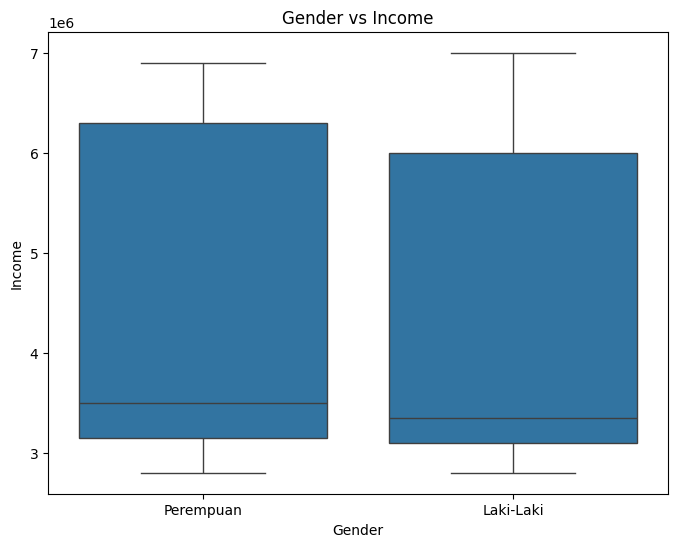

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='jenis_kelamin', y='pendapatan', data=new_data)
plt.title('Gender vs Income')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

In [ ]:
print("\n Age Validation:")
if new_data['umur'].min() < 0:
    print("Invalid age found: Age cannot be negative." \
    "")
else:
    print("Age valid.")


 Age Validation:
Age valid.


In [36]:
print("\nValidation Gender:")
invalid_gender = new_data['jenis_kelamin'].apply(lambda x: x not in ['Laki-Laki', 'Perempuan']).sum()
if invalid_gender > 0:
    print(f"{invalid_gender} gender values are invalid.")
else:
    print("Gender valid.")


Validation Gender:
Gender valid.


In [39]:
duplicate_rows = new_data.duplicated().sum()
if duplicate_rows > 0:
    print(f"\n{duplicate_rows} rows are duplicates.")
    data = new_data.drop_duplicates()
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


In [40]:
print("\nAverage Balance Validation:")
if new_data['saldo_rata_rata'].max() > 1972000:
    print("There is an unrealistic average balance value, need to check.")
else:
    print("The average balance value is within a reasonable range.")


Average Balance Validation:
The average balance value is within a reasonable range.
